<h1>Using a non-linear model to predict if a website will be finished based on the expected hours and the price paid<h1>

In [66]:
import pandas as pd

data = pd.read_csv('data/projects.csv')
data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


Let's change the "unfinished" column to "finished" so it's easier to understand

In [67]:
change = {
    0: 1,
    1: 0
}

data['finished'] = data.unfinished.map(change)
data.head()

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


<AxesSubplot:xlabel='expected_hours', ylabel='price'>

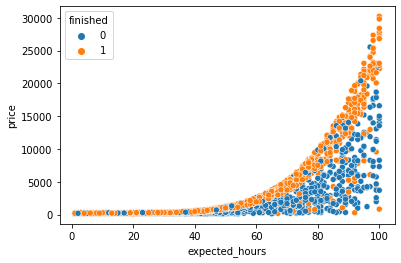

In [68]:
import seaborn as sns

# Let's see the graph
sns.scatterplot(x="expected_hours", y="price", hue="finished", data=data)

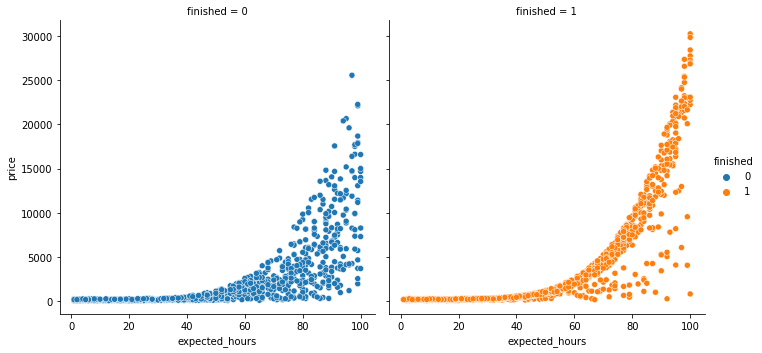

In [69]:
# Seeing it seperately
sns.relplot(x="expected_hours", y="price", hue="finished", col="finished", data=data)

In [70]:
x = data[['expected_hours', 'price']]
y = data['finished']

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)

print("We will train with %d elements and test with %d elements" % (len(train_x), len(test_x)))

model = LinearSVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print("The model's accuracy was %.2f%%" % accuracy)

We will train with 1617 elements and test with 540 elements
The model's accuracy was 49.26%


C:\Users\PEDRO.HECK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


<h3>The accuracy seems very bad. Why is that? Let's explore<h3>

Let's create a baseline to see how bad our accuracy really is

In [72]:
import numpy as np

baseline_predictions = np.ones(540)
accuracy = accuracy_score(test_y, baseline_predictions) * 100
print("The accuracy of the baseline algorithm was %.2f%%" % accuracy)

The accuracy of the baseline algorithm was 52.59%


In [73]:
# Let's get the min an max values for x and y so we can plot multiple points (pixels) in the graph in the model to see how it's doing its predictions
x_min = test_x.expected_hours.min()
x_max = test_x.expected_hours.max()
y_min = test_x.price.min()
y_max = test_x.price.max()

In [74]:
import numpy as np

pixels = 100
x_axis = np.arange(x_min, x_max, (x_max - x_min) / pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [75]:
xx, yy = np.meshgrid(x_axis, y_axis)
points = np.c_[xx.ravel(), yy.ravel()]

In [76]:
Z = model.predict(points)
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

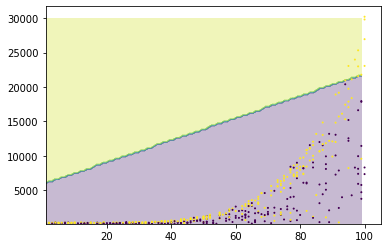

In [77]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(test_x.expected_hours, test_x.price, c=test_y, s=1)

<h3>The problem becomes clear: we are using a <b>linear</b> model to classify a <b>nonlinear</b> graph!<h3>

Let's learn to use the **SVC** model instead of the **LinearSVC** we've been using so far

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 15
np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)

print("We will train with %d elements and test with %d elements" % (len(train_x), len(test_x)))

model = SVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print("The model's accuracy was %.2f%%" % accuracy)

We will train with 1617 elements and test with 540 elements
The model's accuracy was 55.19%


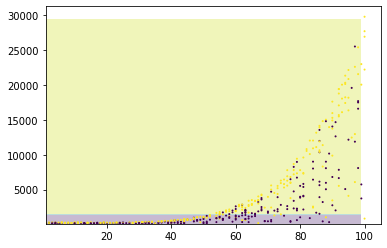

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Let's get the min an max values for x and y so we can plot multiple points (pixels) in the graph in the model to see how it's doing its predictions
x_min = test_x.expected_hours.min()
x_max = test_x.expected_hours.max()
y_min = test_x.price.min()
y_max = test_x.price.max()

pixels = 100
x_axis = np.arange(x_min, x_max, (x_max - x_min) / pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(x_axis, y_axis)
points = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(points)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(test_x.expected_hours, test_x.price, c=test_y, s=1)

<h3>But to use a nonlinear model, we should rescale our axis, since the y-axis is orders of magnitude larger<h3>

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 15
np.random.seed(SEED)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)

print("We will train with %d elements and test with %d elements" % (len(train_x), len(test_x)))

# Rescaling our axis
scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model = SVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print("The model's accuracy was %.2f%%" % accuracy)


We will train with 1617 elements and test with 540 elements
The model's accuracy was 67.22%


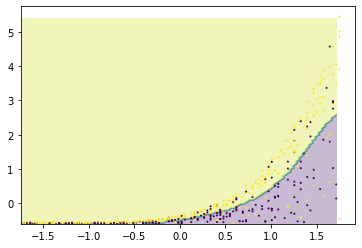

In [90]:
data_x = test_x[:,0]
data_y = test_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
x_axis = np.arange(x_min, x_max, (x_max - x_min) / pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(x_axis, y_axis)
points = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(points)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=test_y, s=1)